In [1]:
from nilearn import plotting
from nilearn import image
import matplotlib.pyplot as plt
import subprocess
import os
%matplotlib inline

In [2]:
all_subs = ["spaceloc1001","spaceloc1002","spaceloc1003","spaceloc1004","spaceloc1005","spaceloc1006","spaceloc1007"] 
all_conds = ['spaceloc','depthloc','distloc','toolloc']
all_copes = [[1,2], [1,2], [1,2], [1,2]]
cope_name=[['Space','Feature'], ['3D',"2D"], ['Distance', 'Luminance'], ['Tool','Non-tool']]
suf = "_roi"


proj_dir = f'/lab_data/behrmannlab/vlad/spaceloc/'
#anat = f'{proj_dir}/anat/sub-{sub_list}_ses-01_T1w_brain.nii.gz'

#func_dir = f'{proj_dir}/derivatives/fsl/'

Cluster corrected masks

In [ ]:
'''Data plotted for each condition for one sub'''
sub = all_subs[0]
conds = all_conds
copes = all_copes
for cc_num,cc in enumerate(conds):
    cond_dir = f'{file_dir}/derivatives/fsl/{cc}/HighLevel{suf}.gfeat/'
    
    for cp_num, cp in enumerate(copes[cc_num]):
        clust_file = f'{cond_dir}/cope{cp}.feat/cluster_mask_zstat1.nii.gz'
        plotting.plot_stat_map(clust_file, cmap = plotting.cm.videen_style, title = cope_name[cc_num][cp_num])
        
        


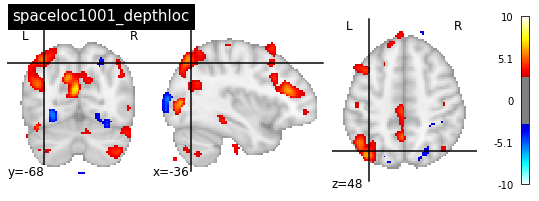

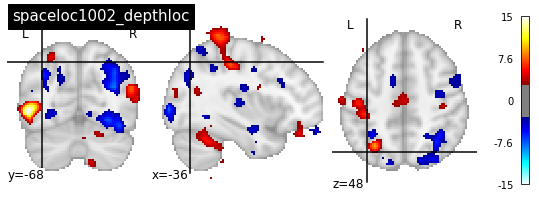

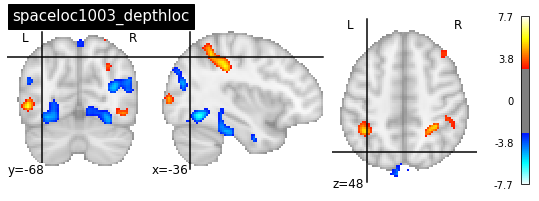

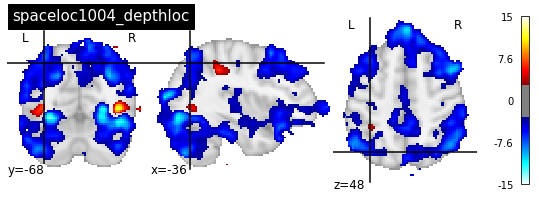

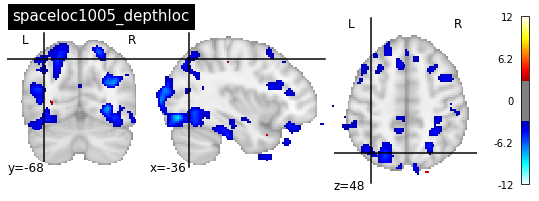

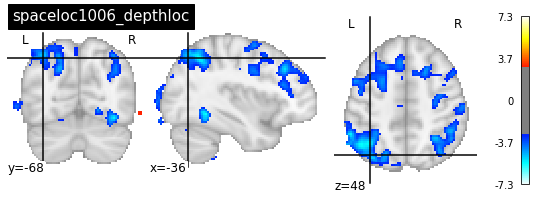

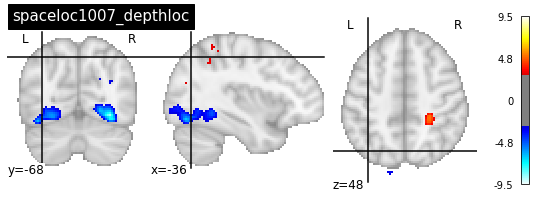

In [3]:
'''Data plotted for one condition for each sub'''
subs = all_subs
conds = all_conds[1]
copes = all_copes[1][0]
for ss_num,ss in enumerate(subs):
    cond_dir = f'{proj_dir}/sub-{ss}/ses-01/derivatives/fsl/{conds}/HighLevel{suf}.gfeat/'
    
    clust_file = f'{cond_dir}/cope{copes}.feat/cluster_mask_zstat1.nii.gz'
    func_file = f'{cond_dir}/cope{copes}.feat/stats/zstat1.nii.gz'
    plotting.plot_stat_map(func_file, cmap = plotting.cm.cold_hot, 
                           cut_coords = [-36, -68, 48], threshold = 3,title = f'{ss}_{conds}')
    
    #plotting.view_img(func_file, threshold=3) 
        
        


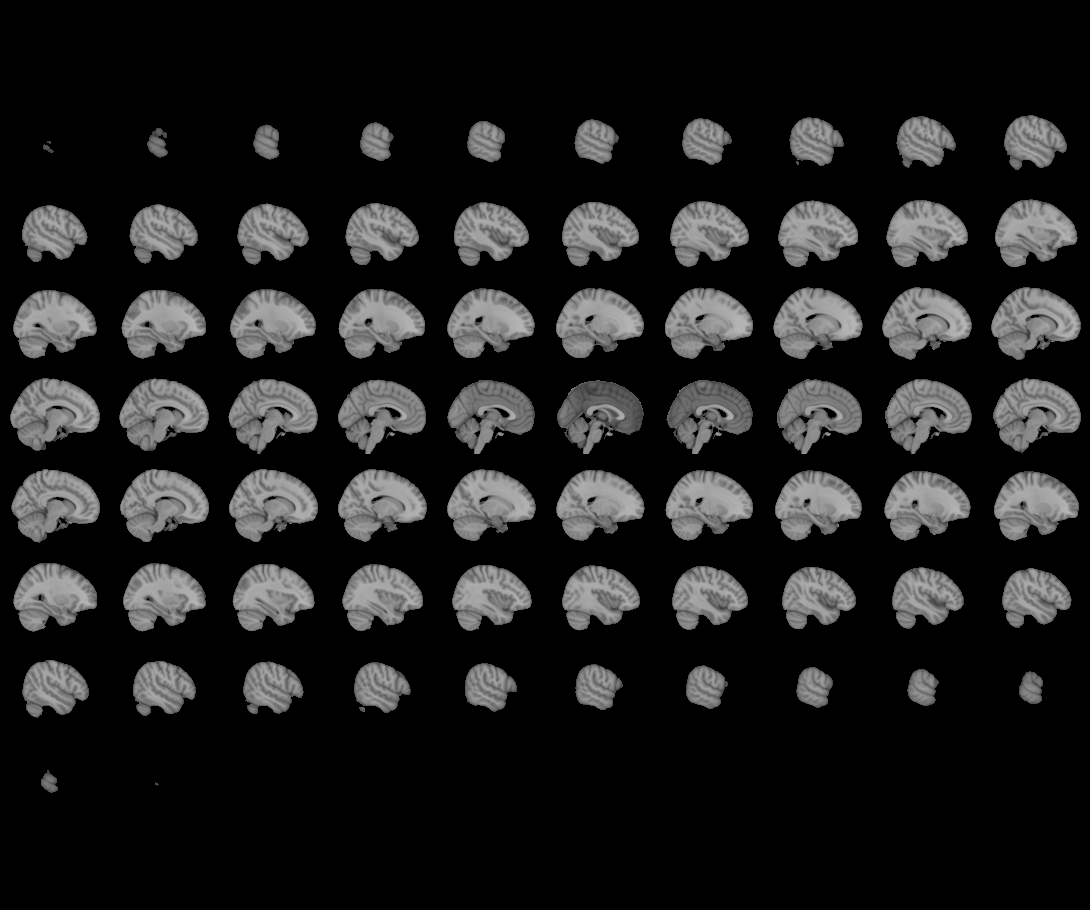
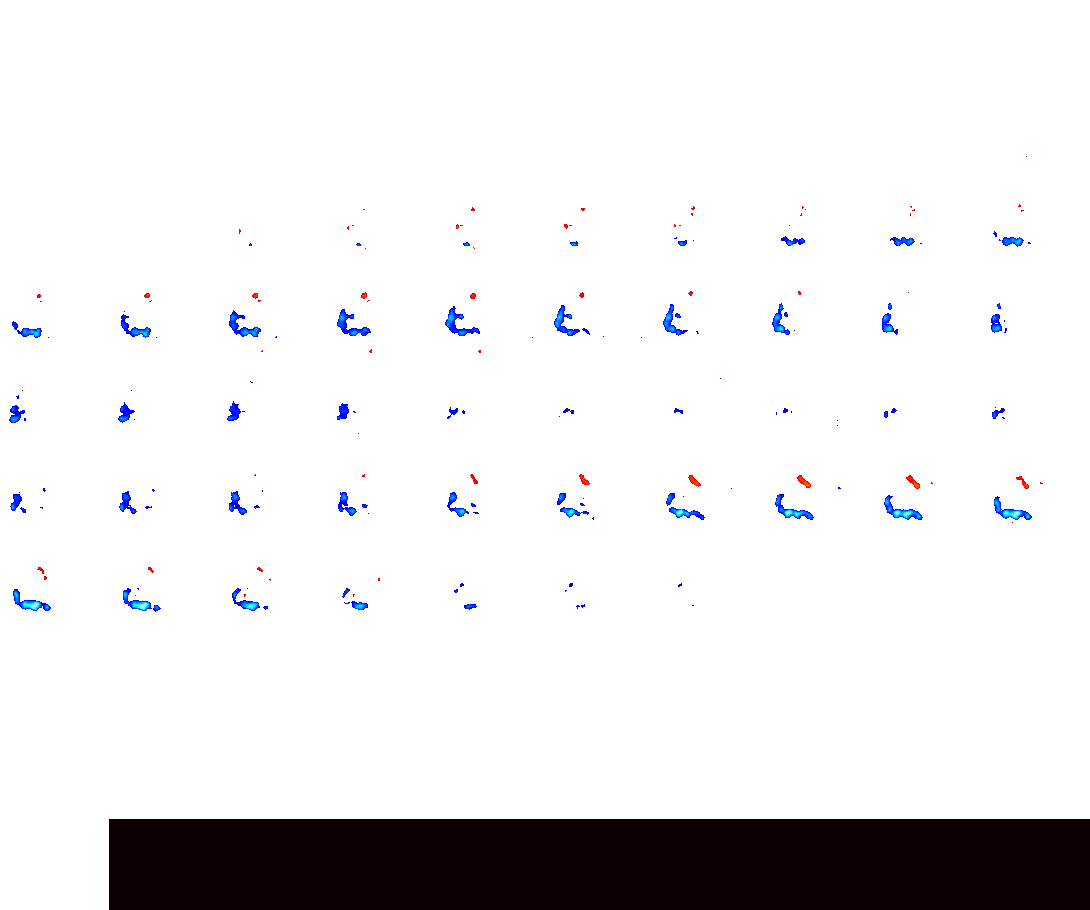

In [6]:
ss = "spaceloc1007"

cond_dir = f'{proj_dir}/sub-{ss}/ses-01/derivatives/fsl/{conds}/HighLevel{suf}.gfeat/'
func_file = f'{cond_dir}/cope{copes}.feat/stats/zstat1.nii.gz'
plotting.view_img(func_file, threshold=3) 

In [ ]:
cc = "spaceloc"
cp = 0
cond_dir = f'{file_dir}/derivatives/fsl/{cond}/HighLevel{suf}.gfeat/'
clust_file = f'{cond_dir}/cope{cp}.feat/cluster_mask_zstat1.nii.gz'
func_file = f'{cond_dir}/cope{cp}.feat/stats/zstat1.nii.gz'
print(clust_file)
plotting.view_img(func_file, threshold=3) 

In [18]:
'''
Make spherical Rois from previous studies
'''
mni = f'$FSLDIR/data/standard/MNI152_T1_2mm_brain.nii.gz'
out_dir = f'{proj_dir}/derivatives/rois/dorsal_spheres'

rois = ['dist_lSPL', 'dist_rSPL', 'dist_rIPL', 
        'depth_lvIPS', 'depth_rvIPS', 'depth_ldIPS', 'depth_rdIPS', 
        'tool_rhand', 'tool_laIPS', 
        'WM_lsIPS','WM_rsIPS']

coords = [[54,32,63], [34,33,66],[20,47,52],
          [57,27,55],[26,23,46],[58,31,64], [34,32,64],
          [29,47,64], [63,38,59],
          [62,35,62],[25,35,61]]
#bash_cmd = 'module load fsl-6.0.3'
#bash_out = subprocess.run(bash_cmd.split(),check=True, capture_output=True, text=True)


for rn, rr in enumerate(rois):
    bash_cmd = f'fslmaths {mni} -mul 0 -add 1 -roi {coords[rn][0]} 1 {coords[rn][1]} 1 {coords[rn][2]} 1 0 1 {out_dir}/{rr}.nii.gz -odt float'
    bash_out = subprocess.run(bash_cmd.split(),check=True, capture_output=True, text=True)

    bash_cmd = f'fslmaths {out_dir}/{rr}.nii.gz -kernel sphere 5 -fmean {out_dir}/{rr}.nii.gz -odt float'
    bash_out = subprocess.run(bash_cmd.split(),check=True, capture_output=True, text=True)

    bash_cmd = f'fslmaths {out_dir}/{rr}.nii.gz -bin {out_dir}/{rr}.nii.gz'
    bash_out = subprocess.run(bash_cmd.split(),check=True, capture_output=True, text=True)
    
    break



CalledProcessError: Command '['fslmaths', '$FSLDIR/data/standard/MNI152_T1_2mm_brain.nii.gz', '-mul', '0', '-add', '1', '-roi', '54', '1', '32', '1', '63', '1', '0', '1', '/lab_data/behrmannlab/vlad/spaceloc//derivatives/rois/dorsal_spheres/dist_lSPL.nii.gz', '-odt', 'float']' died with <Signals.SIGABRT: 6>.

In [16]:
bash_cmd = f'fslmaths {mni} -mul 0 -add 1 -roi {coords[rn][0]} 1 {coords[rn][1]} 1 {coords[rn][2]} 1 0 1 {out_dir}/{rr}.nii.gz -odt float'
bash_out = subprocess.run(bash_cmd.split(), capture_output=True, text=True)

In [17]:
print(bash_out.stdout)